In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [6]:
PG = wb.DataReader('PG', data_source = 'google' , start = '2000')
PG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-09-04,36.84,38.04,36.84,37.76,7429000
2001-09-05,37.76,38.12,37.45,37.94,7687200
2001-09-06,37.94,38.00,37.36,37.75,8744400
2001-09-07,37.45,37.60,36.70,37.18,6475200
2001-09-10,36.72,37.20,36.65,37.10,7404800


In [7]:
PG.describe()

,Open,High,Low,Close,Volume
count,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,64.310367,64.760658,63.871975,64.340745,9.685230e+06
std,13.672555,13.700814,13.653024,13.669276,5.969496e+06
min,34.500000,35.220000,33.000000,33.500000,0.000000e+00
25%,54.450000,54.920000,54.110000,54.490000,6.511079e+06
50%,63.225000,63.660000,62.760000,63.225000,8.460376e+06
75%,76.890000,77.277500,76.260000,76.827500,1.129750e+07
max,93.500000,93.890000,93.140000,93.460000,1.237357e+08


In [12]:
#Simple returns

PG['simple_return'] = (PG['Close']/PG['Close'].shift(1))-1
PG['simple_return'].head()

Date
2001-09-04         NaN
2001-09-05    0.004767
2001-09-06   -0.005008
2001-09-07   -0.015099
2001-09-10   -0.002152
Name: simple_return, dtype: float64

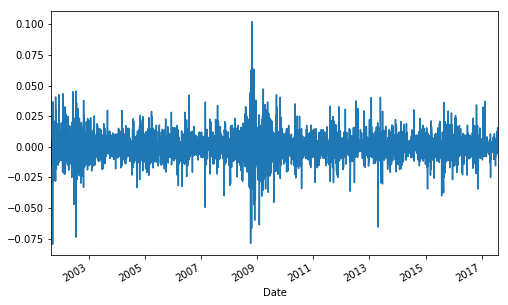

In [16]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [18]:
avg_return = PG['simple_return'].mean()
print avg_return

0.00027827327087


In [27]:
avg_return_a = avg_return*100*250
print str(round(avg_return_a , 5)) + '%'

6.95683%


In [32]:
# log returns
PG['log_return'] = np.log(PG['Close']/PG['Close'].shift(1))
print PG['log_return'].head()

Date
2001-09-04         NaN
2001-09-05    0.004756
2001-09-06   -0.005020
2001-09-07   -0.015214
2001-09-10   -0.002154
Name: log_return, dtype: float64


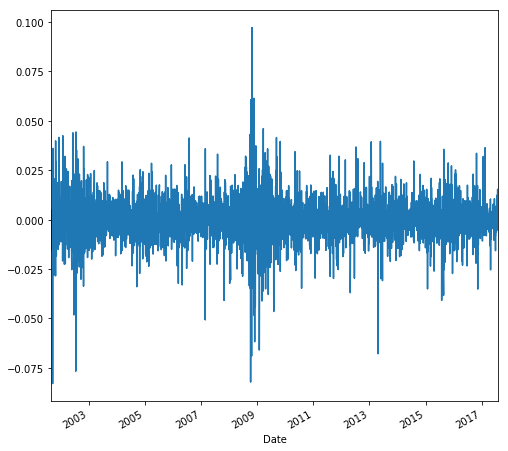

In [34]:
#graph plot
PG['log_return'].plot(figsize=(8,8))
plt.show()

In [42]:
log_avg_return = PG['log_return'].mean() * 250 * 100
log_avg_return
print str(round(log_avg_return,5)) + '%'


5.44442%


In [53]:
#rate of return for a portfolio (aapl,msft,f,ge)
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

tickers = ['PG','MSFT','GE','T','F']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'google', start='1995-1-1')['Close']

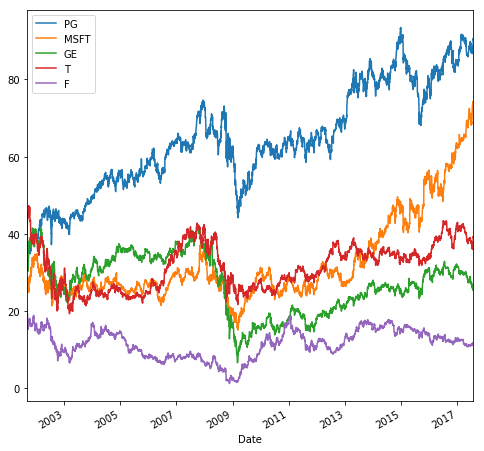

In [62]:
mydata.plot(figsize=(8,8))
plt.show()

In [71]:
mydata.iloc[0]

PG      37.76
MSFT    28.05
GE      40.83
T       42.00
F       20.25
Name: 2001-09-04 00:00:00, dtype: float64

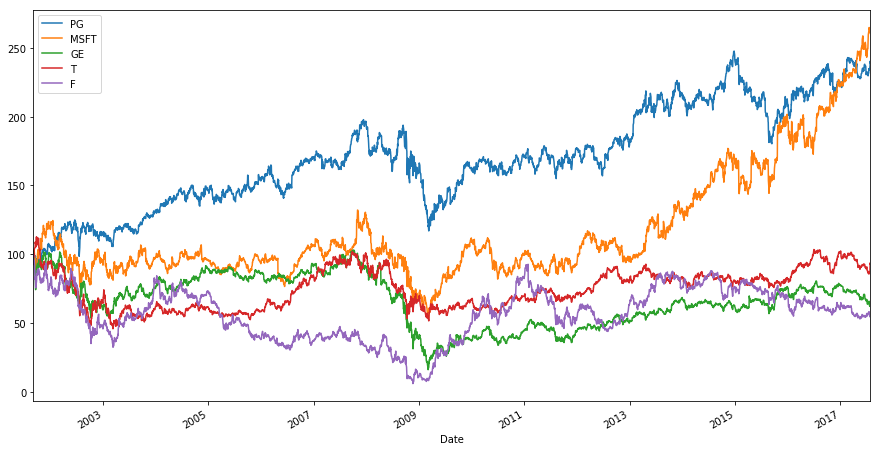

In [67]:
(mydata/mydata.iloc[0] * 100).plot(figsize=(15,8))
plt.show()

In [72]:
#now calculate the simple returns of the data at hand
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,GE,T,F
Date,,,,,
2001-09-04,NaN,NaN,NaN,NaN,NaN
2001-09-05,0.004767,0.029234,0.021308,0.005714,-0.013827
2001-09-06,-0.005008,-0.029789,-0.028777,-0.008049,-0.028543
2001-09-07,-0.015099,-0.011067,-0.020741,-0.021480,-0.032990
2001-09-10,-0.002152,0.039350,-0.007816,0.059268,0.034115


In [79]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])
annual_returns = returns.mean() * 250
annual_returns


PG      0.069568
MSFT    0.098217
GE      0.013474
T       0.024400
F       0.055418
dtype: float64

In [80]:
#np.dot is a dot product of two 2D arrays
np.dot(annual_returns , weights)

0.052215477205323657

In [84]:
portfolio_1 = str(round(np.dot(annual_returns , weights),5)*100) + '%'
portfolio_1

'5.222%'